#1.  Habilitar Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2.cargar librerias

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

3.   Cargar clasificador Haar

In [7]:
face_cascade= cv2.CascadeClassifier('/content/drive/MyDrive/IA/Computer_Vision/OpenCV/HaarCascade/haarcascade_frontalface_default.xml');
img = cv2.imread("/content/drive/MyDrive/IA/Computer_Vision/Images/personas.jpg")
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#4. Identificar rostros en la imagen (detectMultiScale)


In [8]:
faces = face_cascade.detectMultiScale(grayimg,scaleFactor=1.1,minNeighbors=5)
print(faces)

[[ 403   51   49   49]
 [1137   70   43   43]
 [1435   72   43   43]
 [ 535   78   46   46]
 [  79   53   47   47]
 [1293   61   49   49]
 [ 825   68   42   42]
 [ 254   55   50   50]
 [ 977   51   50   50]
 [ 681   57   52   52]
 [ 291  147   53   53]
 [1096  137  123  123]
 [ 714  538   40   40]
 [ 554  520   50   50]
 [1129  518   49   49]
 [1454  520   48   48]
 [1278  524   48   48]
 [ 240  529   47   47]
 [ 399  536   46   46]
 [  91  548   43   43]
 [ 996  544   53   53]
 [ 847  524   54   54]
 [1238  615   51   51]]


#Dibujamos rectángulos de color verde sobre la imagen

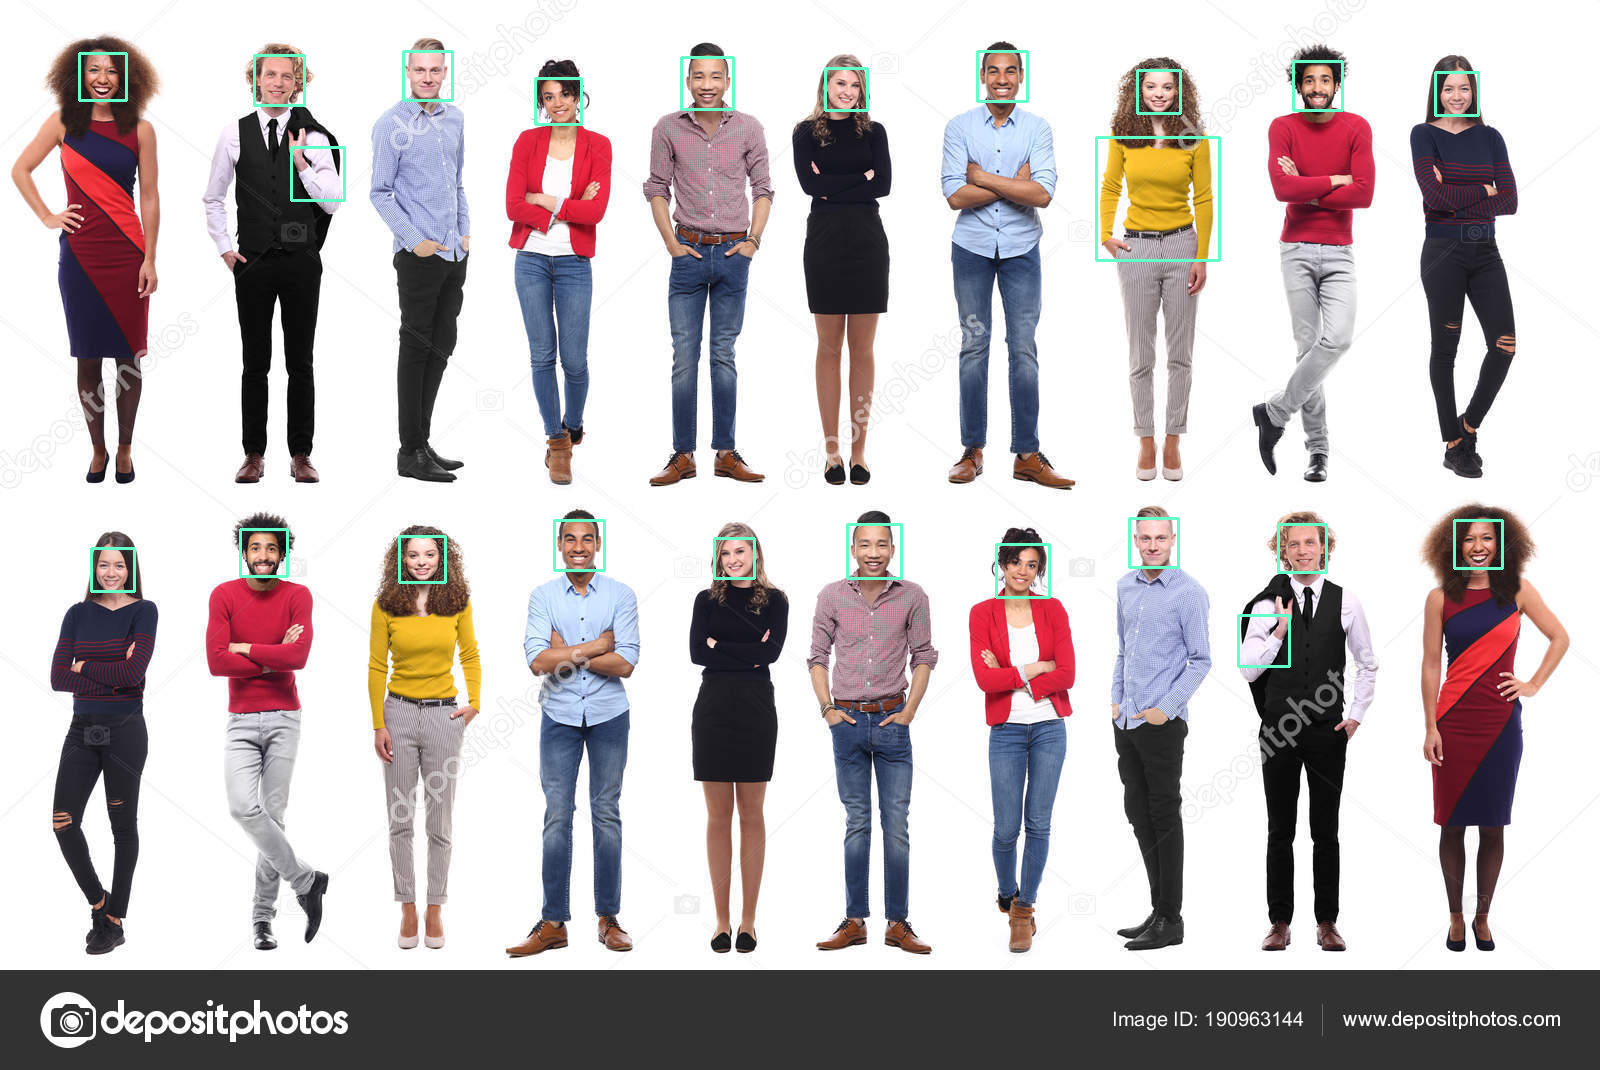

In [9]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(200,255,100),2)
cv2_imshow(img)  

[[  79   53   47   47]
 [ 402   50   51   51]
 [ 826   68   43   43]
 [1135   69   46   46]
 [1433   71   45   45]
 [ 537   80   41   41]
 [ 977   51   51   51]
 [ 254   56   50   50]
 [ 682   57   50   50]
 [1293   61   50   50]
 [ 290  146   53   53]
 [ 553  518   51   51]
 [1129  519   48   48]
 [1455  521   47   47]
 [1279  525   49   49]
 [ 848  525   50   50]
 [ 240  530   48   48]
 [ 399  536   47   47]
 [ 713  535   45   45]
 [  89  547   46   46]
 [1237  614   53   53]
 [1253  704   53   53]]


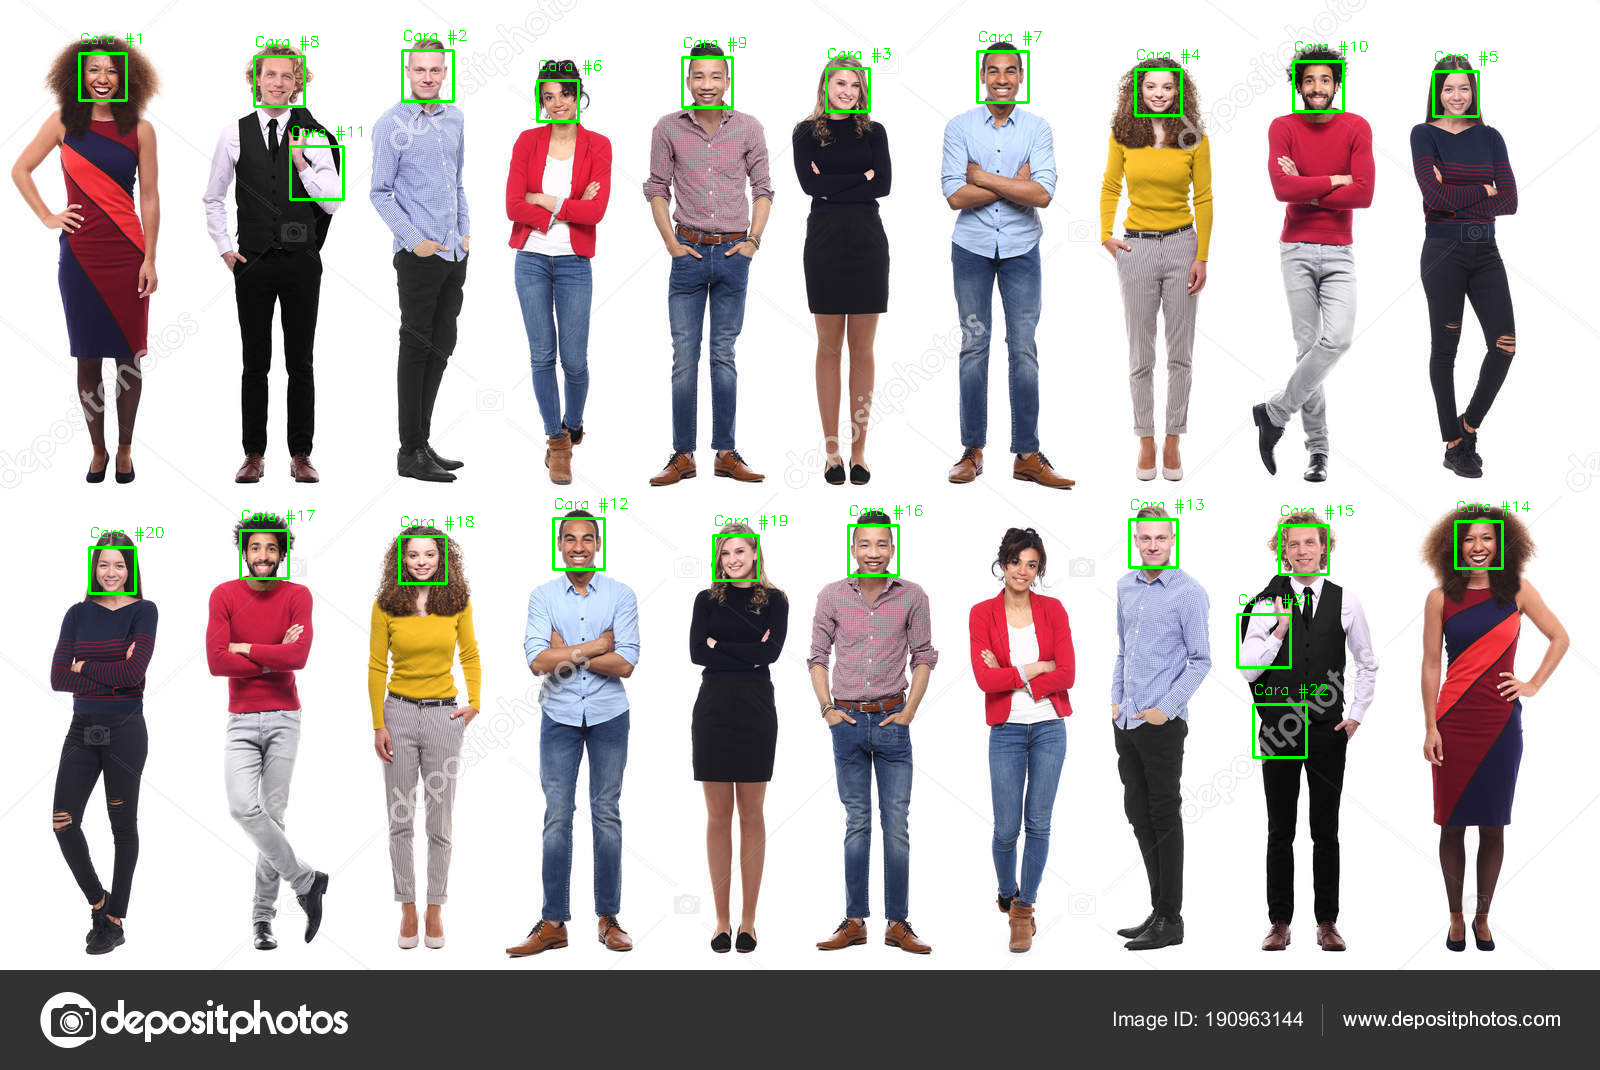

True

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/IA/Computer_Vision/OpenCV/HaarCascade/haarcascade_frontalface_default.xml');
img = cv2.imread("/content/drive/MyDrive/IA/Computer_Vision/Images/personas.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.3,2);
print(faces)
idx=0
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  idx += 1
  cv2.putText(img,"Cara #{}".format(idx),(x,y-10),
  cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),1)
cv2_imshow(img)
cv2.imwrite('/content/drive/MyDrive/IA/Computer_Vision/Images/caras_detectadas.jpg',img)

#trabajar con videos

In [11]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

##cargar video con opencv

In [12]:
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando.mp4')
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
totalframes = int(cv2.VideoCapture.get(videoentrada, property_id))
print( "total de frames: "+str(totalframes) )
print(str(videoentrada.get(3))+"x"+str(videoentrada.get(4))+" pixeles")

total de frames: 1412
640.0x360.0 pixeles


#2. extrayendo solo unos frames

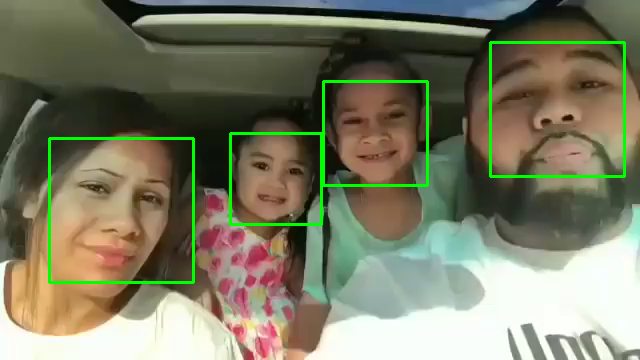

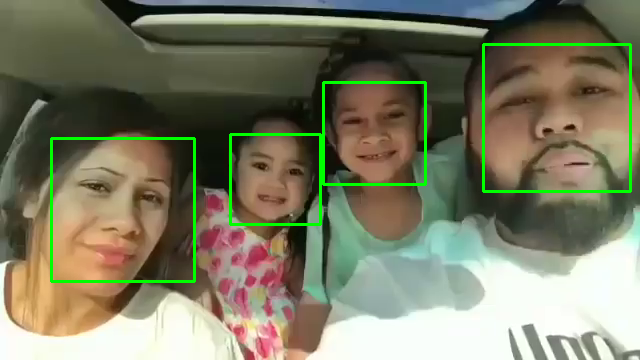

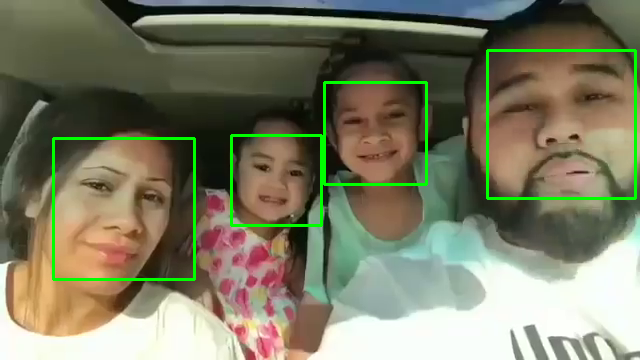

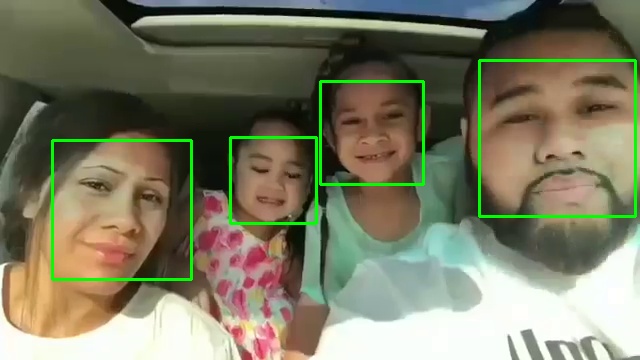

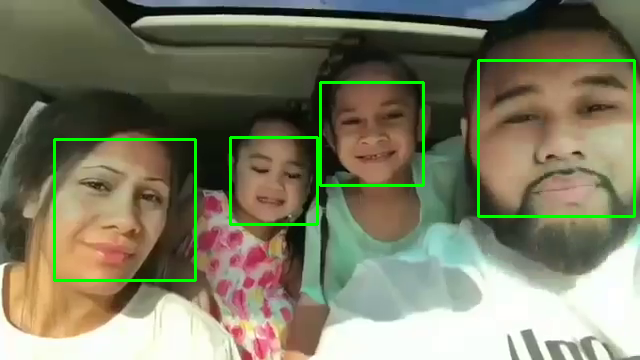

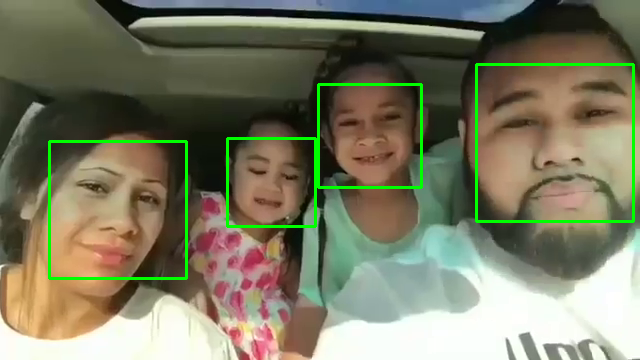

In [13]:
#recorremos los 6 primeros frames de 1412
for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
  for (x, y, w, h) in faces:
    #dibujamos rectángulos verdes alrededor de las caras
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
  cv2_imshow(frame)


In [ ]:

for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  #convertimos el frame a gris
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #detectamos las caras en el frame
  faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
  for (x, y, w, h) in faces:
    #dibujamos rectángulos verdes alrededor de las caras
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
  cv2_imshow(frame)


In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml');
while(videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    # Nuestras operaciones sobre los frames se hacen aqui
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #detectamos las caras en el frame
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x, y, w, h) in faces:
      #dibujamos rectángulos verdes alrededor de las caras
      cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
    cv2_imshow(frame)
  else:
    break  
videoentrada.release()

In [ ]:
pip install pyprind

In [ ]:
import sys
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind
#funcion para ver el avance de procesos en background
def reporthook(step, total_step):
    global start_time
    if step == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    speed = total_step / (1024.**2 * duration)
    percent = step *100 /total_step
    sys.stdout.write("\r %d frames | %d segundos transcurrido" %
                    ( percent, duration))
    sys.stdout.flush()

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')
#video que analizaremos
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 30.0 y el tamaño de cada frame (640x360)
#videosalida = cv2.VideoWriter('/content/drive/My Drive/IA/Computer_Vision/Images/familia_cantando_haar.avi',
#                              codec, 30.0,(640,360))
framenum=0
while (videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    #videosalida.write(frame)
    reporthook(framenum, 1412)
    framenum=framenum+1
  else: break
videoentrada.release()
#videosalida.release()